In [1]:
import csv
import numpy as np
data = []
with open("ANWB.csv", "r") as file:
    csvreader = csv.reader(file)
    for row in csvreader:
            row1 = []
            for i,e in enumerate(row):
                row1.append(float(e))
            data.append(row1)

step = np.array(data)
data = []
for i,row in enumerate(step.T):
     if i != 0 and i != 16 and  i !=20 and i != 40 and  i !=62 and  i !=63:
          data.append(row)

In [11]:
import matplotlib.pyplot as plt

def PlotSpectogram(Data,Db = 45,NFFT=int(2**17),up = 1000,low = 0,fs=50e3):
    Data = Data/max(abs(Data))
    #Plots the amplitude to indentify if this is sufficient for the spectogram
    plt.plot(Data)
    #Formatting of plot
    plt.title('Amplitude Plot')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.show()

    #Plots the spectogram
    fig, ax = plt.subplots()
    cmap = plt.get_cmap('jet')
    cmap.set_under(color='k', alpha=None)
    vmin = 20 * np.log10(np.max(Data)) - Db  # hide anything below -40 dBc
    pxx,  freq, t, cax = ax.specgram(Data, Fs=fs, NFFT=NFFT,vmin=vmin,cmap=cmap)
    #Formatting of plot
    cbar = fig.colorbar(cax)
    cbar.set_label('Intensity dB')
    ax.axis("tight")
    plt.title('Spectogram For Chosen Microphone')
    plt.xlabel('Time [s]')
    plt.ylabel('Frequency [Hz]')
    #Restricts the displayed frequency range
    plt.ylim(low,up)
    print(freq[np.where(np.isclose(pxx, max(pxx)))[0]])

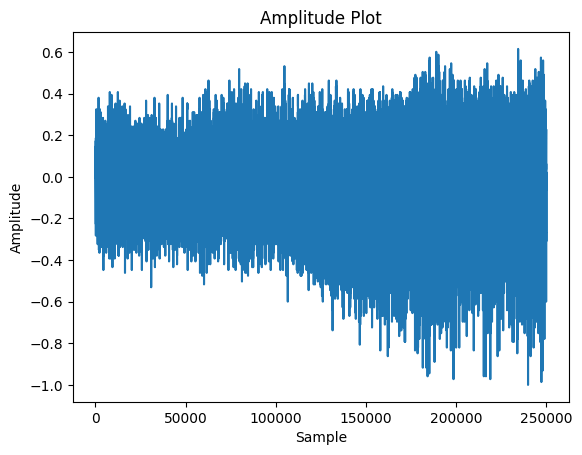

[210.95275879]


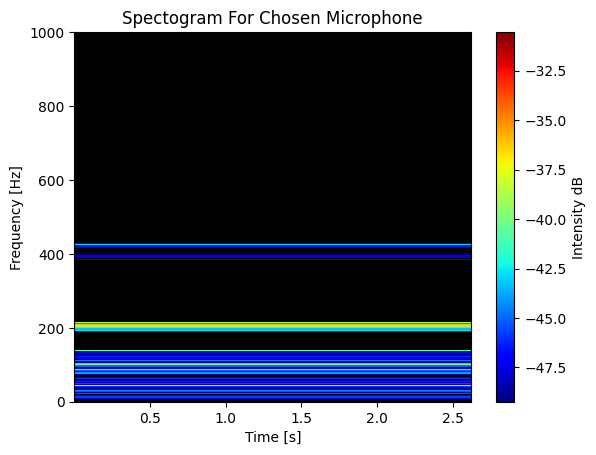

In [14]:
Data = data[25]
PlotSpectogram(Data,45,up=1000)

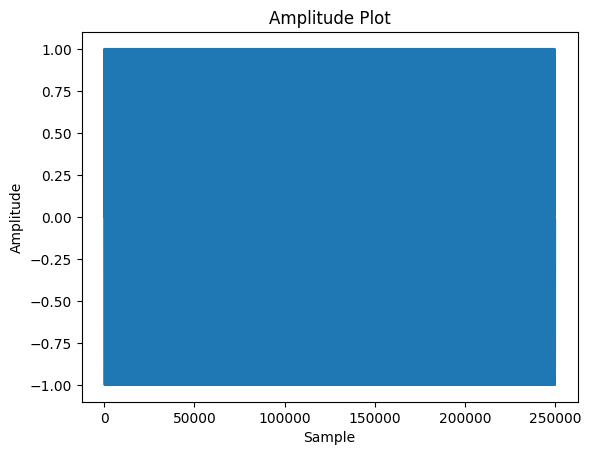

[149.91760254]


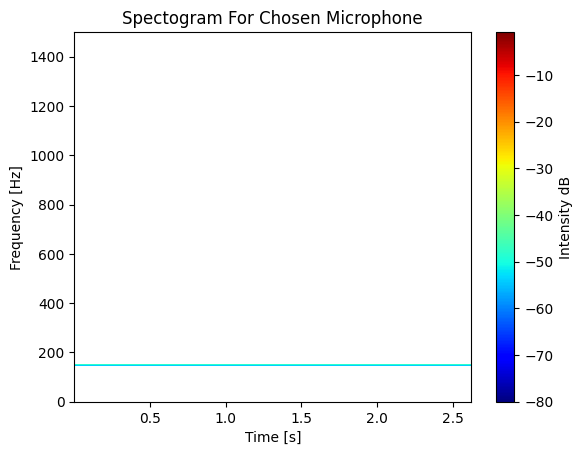

In [8]:
import numpy as np

# Generate a simple sinusoidal signal
fs = 50e3  # Sampling frequency
duration = 5  # Duration of the signal in seconds
frequency = 150  # Frequency of the sinusoid in Hz
t = np.linspace(0, duration, int(fs * duration), endpoint=False)  # Time array
Data = np.sin(2 * np.pi * frequency * t)  # Sinusoidal signal

# Plot the spectrogram
PlotSpectogram(Data,80,up=1500)
